In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image

plt.rcParams.update(
    {
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "font.size": 15,  # Set font size to 11pt
        "axes.labelsize": 15,  # -> axis labels
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "legend.fontsize": 12,
        "lines.linewidth": 2,
        "text.usetex": False,
        "pgf.rcfonts": False,
    }
)


def image_grid(imgs, rows, cols):
    assert len(imgs) == rows * cols

    w, h = imgs[0].shape[1], imgs[0].shape[0]
    grid = Image.new("RGB", size=(cols * w, rows * h))
    for i, img in enumerate(imgs):
        img = img.astype(np.uint8)
        grid.paste(Image.fromarray(img), box=(i % cols * w, i // cols * h))
    return grid

In [2]:
metrics_path = "/storage2/bartosz/code/t2i2/results_if/glyph_simple/attention_localization/model_IF-I-XL-v1.0_seed_42_samples_1_batch_8_device_cuda_steps_50_guidance_scale_9.0_20240905_232454/metrics.csv"

In [5]:
metrics = pd.read_csv(metrics_path)

In [4]:
metrics["Block_patched"].unique()

array(['-', 'Model', 'A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17',
       'A18', 'A19', 'A20', 'A21'], dtype=object)

In [ ]:
metrics2 = pd.read_csv(
    "/storage2/bartosz/code/t2i2/results_sdxl/wiki398_T_20240814_174348/metrics.csv"
)

In [ ]:
metrics = pd.concat([metrics, metrics2])

In [9]:
metrics["Block_patched"].unique()

array(['-', 'Model', 'A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17',
       'A18', 'A19', 'A20', 'A21'], dtype=object)

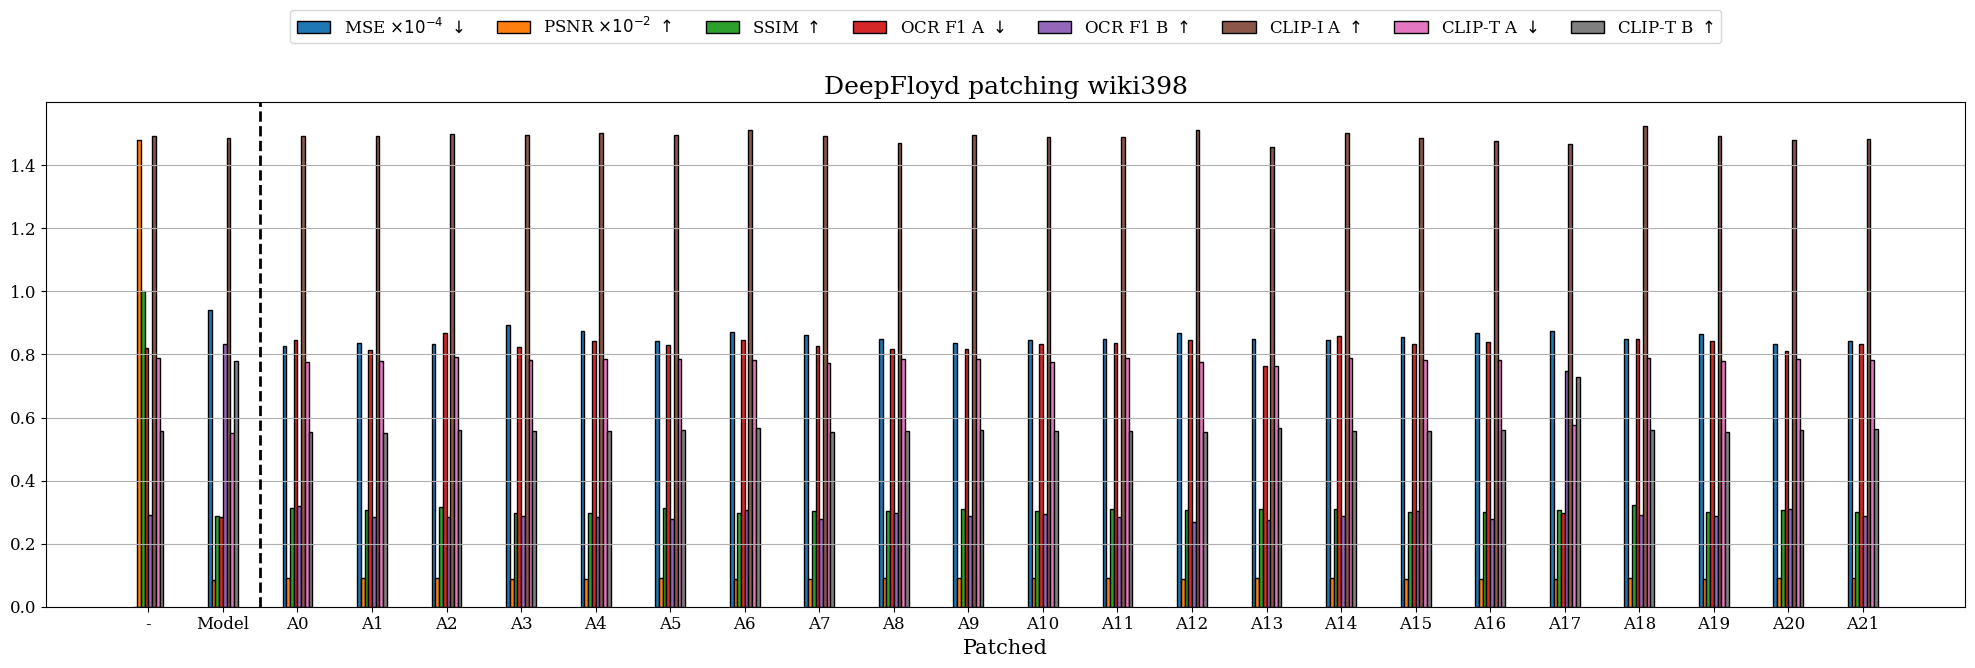

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 7))

width = 0.05  # Width of each bar

selected_runs = metrics["Block_patched"].unique()
x = np.arange(len(selected_runs))

mses = [
    metrics.loc[metrics["Block_patched"] == run, "MSE"].mean() / 10000
    for run in selected_runs
]
psnrs = [
    metrics.loc[metrics["Block_patched"] == run, "PSNR"].mean() / 100
    for run in selected_runs
]
ssims = [
    metrics.loc[metrics["Block_patched"] == run, "SSIM"].mean() for run in selected_runs
]
ocr_f1s_a = [
    (
        2
        * metrics.loc[metrics["Block_patched"] == run, "OCR_A_Prec"].mean()
        * metrics.loc[metrics["Block_patched"] == run, "OCR_A_Rec"].mean()
    )
    / (
        metrics.loc[metrics["Block_patched"] == run, "OCR_A_Prec"].mean()
        + metrics.loc[metrics["Block_patched"] == run, "OCR_A_Rec"].mean()
        + 1e-6
    )
    for run in selected_runs
]
ocr_f1s_b = [
    (
        2
        * metrics.loc[metrics["Block_patched"] == run, "OCR_B_Prec"].mean()
        * metrics.loc[metrics["Block_patched"] == run, "OCR_B_Rec"].mean()
    )
    / (
        metrics.loc[metrics["Block_patched"] == run, "OCR_B_Prec"].mean()
        + metrics.loc[metrics["Block_patched"] == run, "OCR_B_Rec"].mean()
        + 1e-6
    )
    for run in selected_runs
]
clip_ims = [
    metrics.loc[metrics["Block_patched"] == run, "CLIPScore_image"].mean()
    for run in selected_runs
]
clip_a = [
    metrics.loc[metrics["Block_patched"] == run, "CLIPScore_prompt_A"].mean()
    for run in selected_runs
]
clip_b = [
    metrics.loc[metrics["Block_patched"] == run, "CLIPScore_prompt_B"].mean()
    for run in selected_runs
]


plt.bar(
    x - 3.5 * width,
    mses,
    width,
    label=r"MSE $\times 10^{-4}$ $\downarrow$",
    edgecolor="black",
)
plt.bar(
    x - 2.5 * width,
    psnrs,
    width,
    label=r"PSNR $\times 10^{-2}$ $\uparrow$",
    edgecolor="black",
)
plt.bar(x - 1.5 * width, ssims, width, label=r"SSIM $\uparrow$", edgecolor="black")
plt.bar(
    x - 0.5 * width, ocr_f1s_a, width, label=r"OCR F1 A $\downarrow$", edgecolor="black"
)
plt.bar(
    x + 0.5 * width, ocr_f1s_b, width, label=r"OCR F1 B $\uparrow$", edgecolor="black"
)
plt.bar(
    x + 1.5 * width, clip_ims, width, label=r"CLIP-I A $\uparrow$", edgecolor="black"
)
plt.bar(
    x + 2.5 * width, clip_a, width, label=r"CLIP-T A $\downarrow$", edgecolor="black"
)
plt.bar(x + 3.5 * width, clip_b, width, label=r"CLIP-T B $\uparrow$", edgecolor="black")


plt.axvline(x=1.5, color="black", linestyle="--")
plt.xticks(x, selected_runs)

plt.title("DeepFloyd patching wiki398")
plt.xlabel("Patched")
plt.grid(axis="y")

plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=8)
plt.tight_layout()
plt.show()


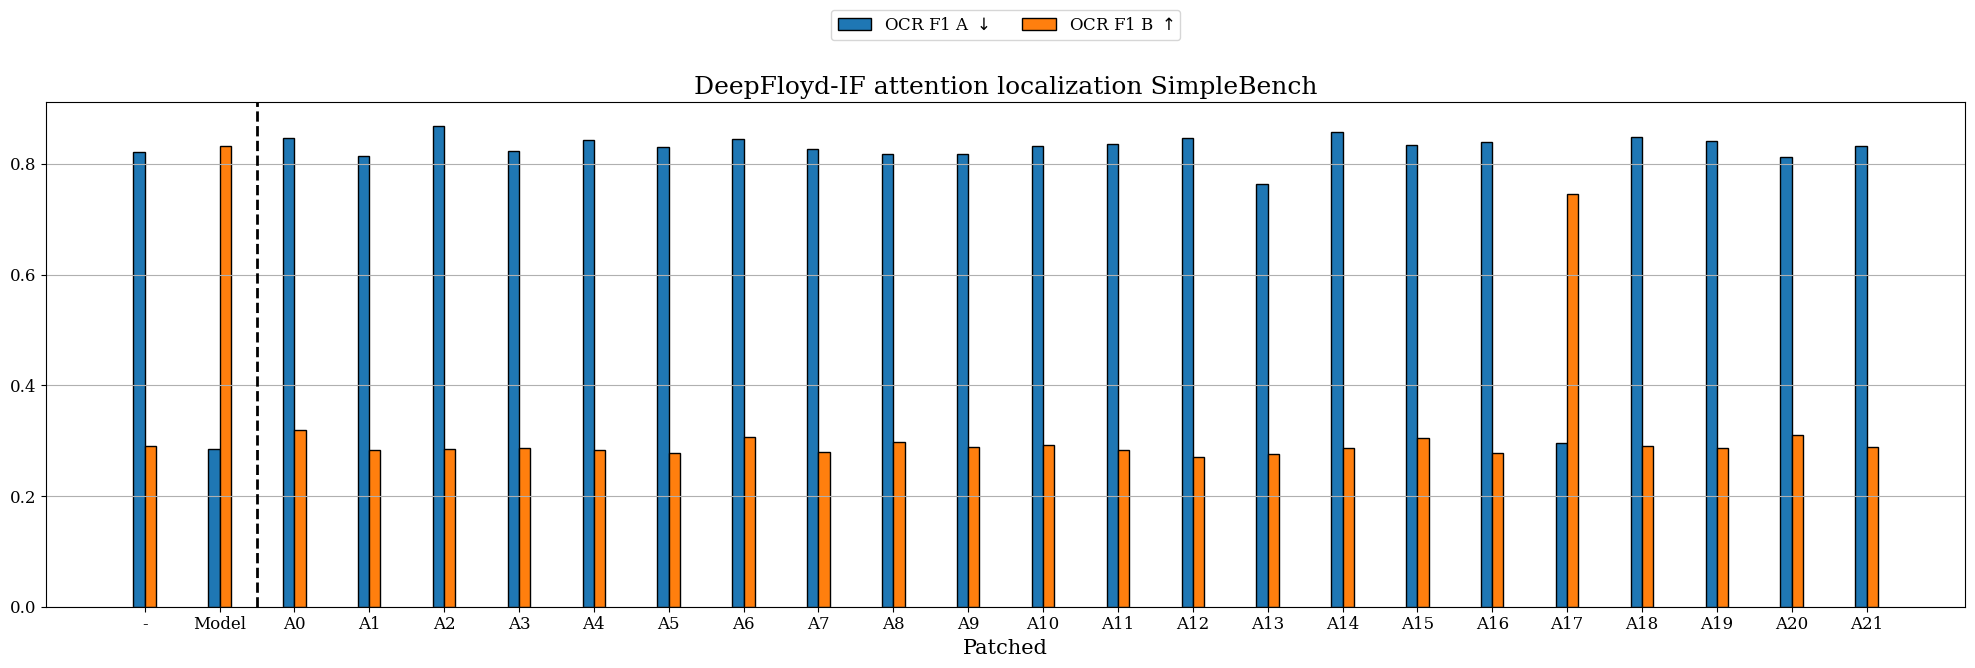

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 7))

width = 0.15  # Width of each bar

selected_runs = metrics["Block_patched"].unique()
x = np.arange(len(selected_runs))


plt.bar(
    x - 0.5 * width, ocr_f1s_a, width, label=r"OCR F1 A $\downarrow$", edgecolor="black"
)
plt.bar(
    x + 0.5 * width, ocr_f1s_b, width, label=r"OCR F1 B $\uparrow$", edgecolor="black"
)


plt.axvline(x=1.5, color="black", linestyle="--")
plt.xticks(x, selected_runs)

plt.title("DeepFloyd-IF attention localization SimpleBench")
plt.xlabel("Patched")
plt.grid(axis="y")

plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=8)
plt.tight_layout()
plt.show()


In [20]:
metrics.columns

Index(['Unnamed: 0', 'MSE', 'PSNR', 'SSIM', 'OCR_A_Prec', 'OCR_A_Rec',
       'OCR_A_Acc', 'OCR_B_Prec', 'OCR_B_Rec', 'OCR_B_Acc', 'CLIPScore_image',
       'CLIPScore_prompt_A', 'CLIPScore_prompt_B', 'Levenshtein_A',
       'Levenshtein_B', 'Prompts_A', 'Prompts_B', 'OCR_texts', 'Texts_A',
       'Texts_B', 'Block_patched'],
      dtype='object')

In [24]:
metrics.loc[metrics["Block_patched"] == "A17", "OCR_B_Acc"].mean()

0.11

In [25]:
metrics.loc[metrics["Block_patched"] == "Model", "OCR_B_Acc"].mean()

0.33